In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_2018 = pd.read_sas('gss2018.sas7bdat')
df_2022 = pd.read_sas('gss2022.sas7bdat')
# print("2018:\n", df_2018.head(10))
# print("2022:\n", df_2022.head(10))

In [6]:
df_2018_test = pd.read_sas('gss2018.sas7bdat')
df_2022_test = pd.read_sas('gss2022.sas7bdat')

In [9]:
vars_test = ['MARITAL', 'HAPMAR']

test18 = df_2018_test[vars_test]
test22 = df_2022_test[vars_test]

In [3]:
# create smaller dataframe with only the stuff we need

vars = ['HAPPY'] # idk which variables we are using, but we can list them in here

df_2018 = df_2018[vars]
df_2022 = df_2022[vars]

In [4]:
# Clean Data * NOTE: i have not done anything with null vals, just checked if they exist*
## RENAME COLUMNS:
df_2018 = df_2018.rename(columns={'HAPPY': 'HAPPY_2018'})
df_2022 = df_2022.rename(columns={'HAPPY': 'HAPPY_2022'})

## TO NUMERIC:
df_2018['HAPPY_2018'] = pd.to_numeric(df_2018['HAPPY_2018'], errors='coerce')
df_2022['HAPPY_2022'] = pd.to_numeric(df_2022['HAPPY_2022'], errors='coerce')

## NULL VALUES:
null_2018 = df_2018.isnull().sum()
null_2022 = df_2022.isnull().sum()

print("\nnull count 2018: ", null_2018, "\nnull count 2022: ", null_2022)
# 2018 data has 4 null values, 2022 data has 24 null values

## OUTLIERS:
print("2018 values: \n", df_2018.value_counts())
print("2022 values: \n", df_2022.value_counts())
# no outlier values


null count 2018:  HAPPY_2018    4
dtype: int64 
null count 2022:  HAPPY_2022    24
dtype: int64
2018 values: 
 HAPPY_2018
2.0           1307
1.0            701
3.0            336
dtype: int64
2022 values: 
 HAPPY_2022
2.0           1942
3.0            799
1.0            779
dtype: int64


In [5]:
#merge the data into one data frame
df = df_2018.merge(df_2022, left_index=True, right_index=True)

print("2018 values: \n", df['HAPPY_2018'].value_counts())
print("2022 values: \n", df['HAPPY_2022'].value_counts())

2018 values: 
 2.0    1307
1.0     701
3.0     336
Name: HAPPY_2018, dtype: int64
2022 values: 
 2.0    1291
3.0     530
1.0     510
Name: HAPPY_2022, dtype: int64


In [ ]:
print(df.describe())
print(df.value_counts())

        HAPPY_2018   HAPPY_2022
count  2344.000000  2331.000000
mean      1.844283     2.008580
std       0.646790     0.668041
min       1.000000     1.000000
25%       1.000000     2.000000
50%       2.000000     2.000000
75%       2.000000     2.000000
max       3.000000     3.000000
HAPPY_2018  HAPPY_2022
2.0         2.0           730
1.0         2.0           381
2.0         3.0           290
            1.0           279
3.0         2.0           178
1.0         3.0           158
            1.0           157
3.0         3.0            80
            1.0            74
dtype: int64


In [ ]:
#change data frames so they contain happiness rating and year it was recorded
df18 = df_2018.rename(columns={'HAPPY_2018': 'HAPPY'})
df22 = df_2022.rename(columns={'HAPPY_2022': 'HAPPY'})

df18['YEAR'] = 2018
df22['YEAR'] = 2022

print(df18.head())
print(df22.head())

   HAPPY  YEAR
0    2.0  2018
1    1.0  2018
2    1.0  2018
3    1.0  2018
4    2.0  2018
   HAPPY  YEAR
0    3.0  2022
1    3.0  2022
2    3.0  2022
3    3.0  2022
4    2.0  2022


In [ ]:
#merge previous data frames together
df_merged = pd.concat([df18, df22], ignore_index=True)

# print(df_merged.head(), '\n')
# print(df_merged['HAPPY'].unique(), '\n')
# print(df_merged['YEAR'].unique(), '\n')

Text(0, 0.5, 'Frequency')

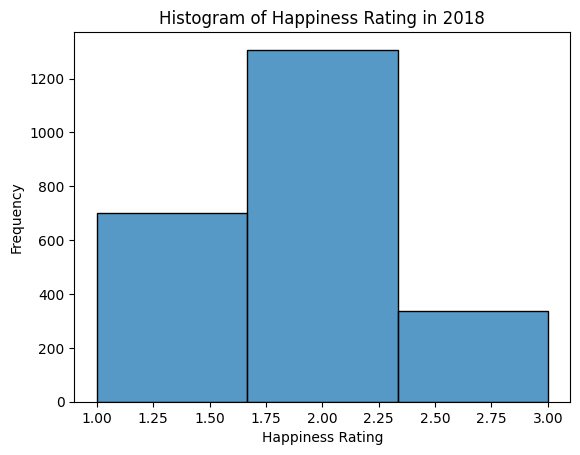

In [ ]:
# idk if this is the chart types we wanted to use, i just went with two histograms based on the values we have, but maybe a stacked barplot would also work
sns.histplot(data=df, x="HAPPY_2018", bins=3)
plt.title("Histogram of Happiness Rating in 2018") # also dk if this is an accurate title/axes names
plt.xlabel("Happiness Rating")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

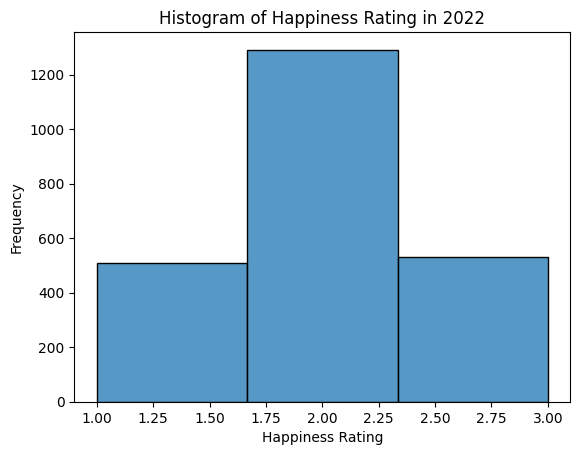

In [ ]:
sns.histplot(data=df, x="HAPPY_2022", bins=3)
plt.title("Histogram of Happiness Rating in 2022") # also dk if this is an accurate title/axes names
plt.xlabel("Happiness Rating")
plt.ylabel("Frequency")

In [ ]:
# merge dataframes from both df_mods

<Axes: ylabel='Density'>

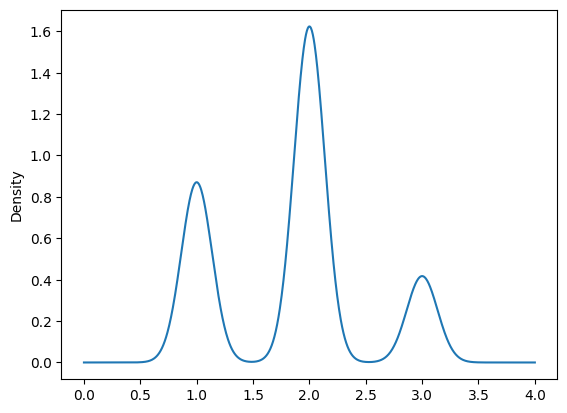

In [ ]:
# kernel density for 2018

df['HAPPY_2018'].plot.density()

<Axes: ylabel='Density'>

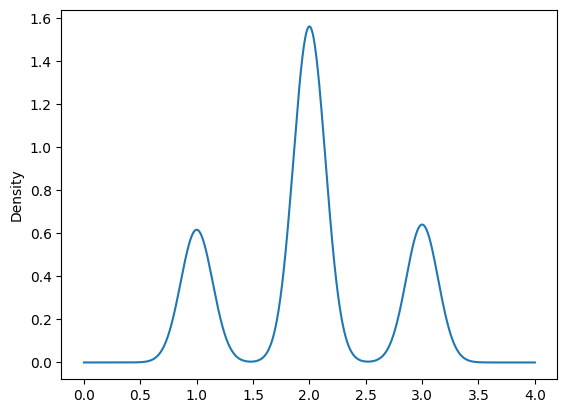

In [ ]:
#and 2022

df['HAPPY_2022'].plot.density()

#will do the grouped ones when we merge the dataset

<Axes: ylabel='Density'>

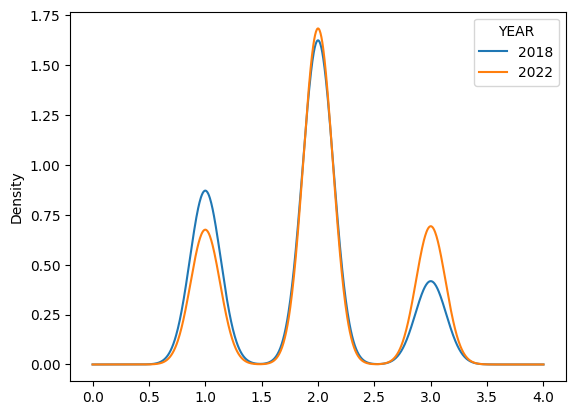

In [ ]:
#grouped kernel,  grouped by year
group_by = 'YEAR'
var = 'HAPPY'
df_wide = df_merged.pivot(columns=group_by,values=var)
df_wide.plot.density()

In [ ]:
# computing average happiness score because mean will be resistant to the different size of the data set
# using df18 and df22

mean18 = np.mean(df18['HAPPY'])
print(mean18, '\n')
mean22 = np.mean(df22['HAPPY'])
print(mean22, '\n')

delta_happy = mean22 - mean18
print('happiness change: ' + str(delta_happy))

# remember that according to this measure, higher numbers mean less happy

1.844283276450512 

2.0056818181818183 

happiness change: 0.1613985417313064


In [ ]:
# calculating delta of respondents that chose not to answer
null18 = df18['HAPPY'].isnull().sum()
null22 = df22['HAPPY'].isnull().sum()
count18 = df18['HAPPY'].count()
count22 = df22['HAPPY'].count()

print('null percentage (2018): ' + str(null18 / count18))
print('null percentage (2022): ' + str(null22 / count22))

null percentage (2018): 0.0017064846416382253
null percentage (2022): 0.006818181818181818


In [ ]:
# while this doesn't seem statistically significant (0.1% versus 0.7%), it might be worth highlighting

In [ ]:
# change variables to categorical for cleaner visualizations
# using merged dataset

df_merged['HAPPY'] = df_merged['HAPPY'].replace(1.0,'Very Happy')
df_merged['HAPPY'] = df_merged['HAPPY'].replace(2.0,'Pretty Happy')
df_merged['HAPPY'] = df_merged['HAPPY'].replace(3.0,'Not Too Happy')
df_merged.head()

,HAPPY,YEAR
0,Pretty Happy,2018
1,Very Happy,2018
2,Very Happy,2018
3,Very Happy,2018
4,Pretty Happy,2018


Text(0, 0.5, 'Total Responses')

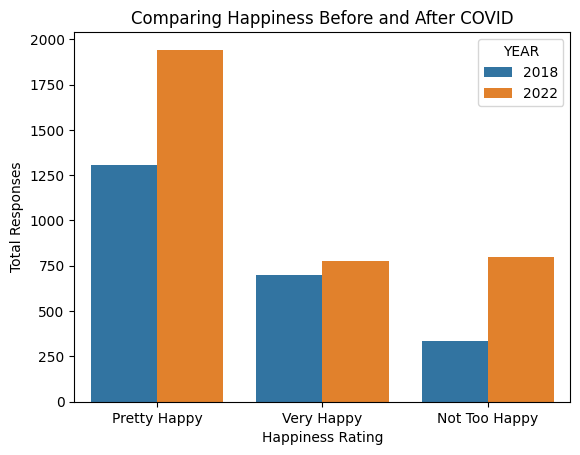

In [ ]:
# plot of merged happiness side by side
sns.countplot(data=df_merged, x='HAPPY', hue='YEAR')
plt.title("Comparing Happiness Before and After COVID") # also dk if this is an accurate title/axes names
plt.xlabel("Happiness Rating")
plt.ylabel("Total Responses")

In [ ]:
# gonna make some pie charts just for fun
print(df18.value_counts(), '\n')
print(df22.value_counts(), '\n')

HAPPY  YEAR
2.0    2018    1307
1.0    2018     701
3.0    2018     336
dtype: int64 

HAPPY  YEAR
2.0    2022    1942
3.0    2022     799
1.0    2022     779
dtype: int64 



In [ ]:
data18 = [1307, 701, 336, null18]
data22 = [1942, 779, 799, null22]
labels = ['Pretty Happy', 'Very Happy', 'Not Too Happy', "Didn't Respond"]

Text(0.5, 1.0, 'Happiness in the U.S., 2018')

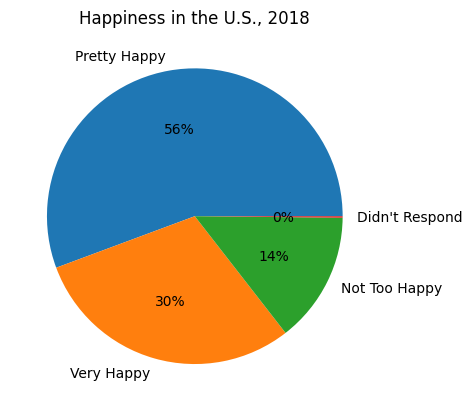

In [ ]:
# 2018 pie chart

plt.pie(data18, labels=labels, autopct='%.0f%%')
plt.title('Happiness in the U.S., 2018')

Text(0.5, 1.0, 'Happiness in the U.S., 2022')

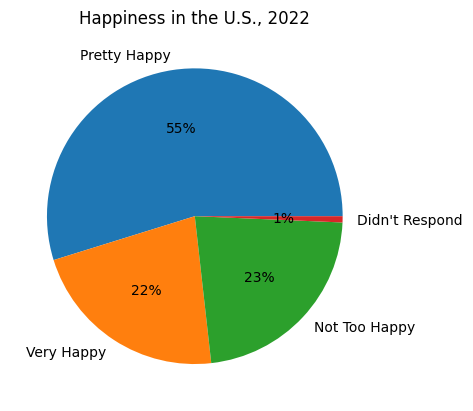

In [ ]:
# 2022 pie chart

plt.pie(data22, labels=labels, autopct='%.0f%%')
plt.title('Happiness in the U.S., 2022')

In [19]:
# uhhh

mar18 = test18['MARITAL'].to_frame()
mar22 = test22['MARITAL'].to_frame()
print(mar18.describe())
print(mar22.describe())


           MARITAL
count  2346.000000
mean      2.667093
std       1.688668
min       1.000000
25%       1.000000
50%       2.000000
75%       5.000000
max       5.000000
           MARITAL
count  3529.000000
mean      2.752338
std       1.716396
min       1.000000
25%       1.000000
50%       3.000000
75%       5.000000
max       5.000000


In [20]:
mar18['year'] = 2018
mar22['year'] = 2022
print(mar18.head())


   MARITAL  year
0      5.0  2018
1      4.0  2018
2      1.0  2018
3      1.0  2018
4      3.0  2018


In [21]:
mar_merge = pd.concat([mar18, mar22], ignore_index=True)
mar_merge.head()

,MARITAL,year
0,5.0,2018
1,4.0,2018
2,1.0,2018
3,1.0,2018
4,3.0,2018


<Axes: ylabel='Density'>

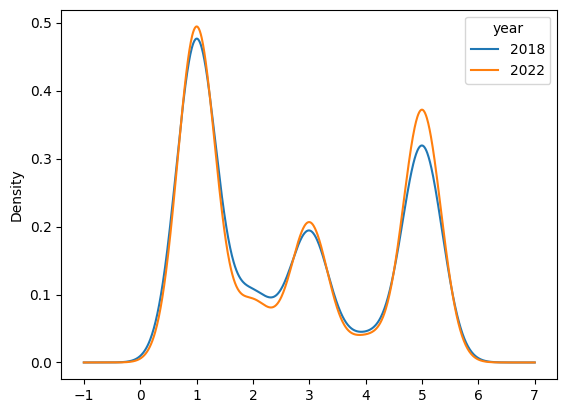

In [23]:
group_by = 'year'
var = 'MARITAL'
mar_wide = mar_merge.pivot(columns=group_by,values=var)
mar_wide.plot.density()

In [26]:
mar_merge = mar_merge.replace(1.0,'married')
mar_merge = mar_merge.replace(2.0,'widowed')
mar_merge = mar_merge.replace(3.0,'prev_mar/sep')
mar_merge = mar_merge.replace(4.0,'prev_mar/sep')
mar_merge = mar_merge.replace(5.0,'unmar')

<Axes: xlabel='MARITAL', ylabel='count'>

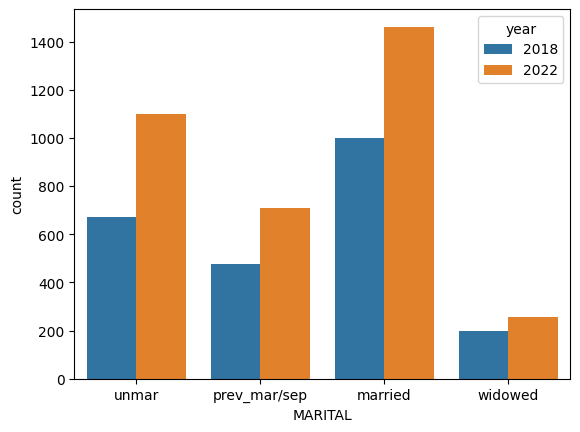

In [27]:
sns.countplot(data=mar_merge, x='MARITAL', hue='year')

In [43]:
print(mar18.value_counts(normalize=True))
print(mar22.value_counts(normalize=True))

MARITAL  year
1.0      2018    0.425405
5.0      2018    0.285592
3.0      2018    0.171782
2.0      2018    0.085251
4.0      2018    0.031969
dtype: float64
MARITAL  year
1.0      2022    0.414282
5.0      2022    0.311986
3.0      2022    0.172287
2.0      2022    0.072258
4.0      2022    0.029187
dtype: float64


In [38]:
data18 = mar18.value_counts(sort=False).to_list()
data22 = mar22.value_counts(sort=False).to_list()
labels = ['Married','Widowed','Divorced','Separated','Never Married']

([<matplotlib.patches.Wedge at 0x7dc7bf9aa260>,
 [Text(0.25542899859153256, 1.0699327206317821, 'Married'),
  Text(-1.077882890183882, 0.21947317614879908, 'Widowed'),
  Text(-0.9037346651041006, -0.62710737126044, 'Divorced'),
  Text(-0.350268810772909, -1.042742422748654, 'Separated'),
  Text(0.686167784123872, -0.8597521573282242, 'Never Married')],
 [Text(0.13932490832265412, 0.5835996657991538, '43%'),
  Text(-0.587936121918481, 0.11971264153570857, '9%'),
  Text(-0.49294618096587295, -0.34205856614205815, '17%'),
  Text(-0.19105571496704124, -0.5687685942265384, '3%'),
  Text(0.37427333679483926, -0.4689557221790313, '29%')])

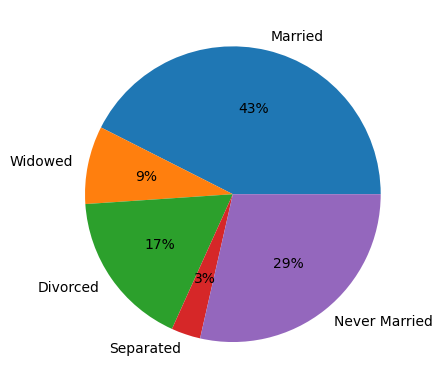

In [39]:
plt.pie(data18,labels=labels, autopct='%.0f%%')

([<matplotlib.patches.Wedge at 0x7dc7bf81cbe0>,
 [Text(0.29265401488699605, 1.0603554251148632, 'Married'),
  Text(-1.0470362270723894, 0.33721675402923895, 'Widowed'),
  Text(-0.9872717926306035, -0.485071548821362, 'Divorced'),
  Text(-0.5090933382302987, -0.9751020320815309, 'Separated'),
  Text(0.6126021558353654, -0.9136293551905295, 'Never Married')],
 [Text(0.1596294626656342, 0.5783756864262889, '41%'),
  Text(-0.5711106693122123, 0.18393641128867577, '7%'),
  Text(-0.53851188688942, -0.2645844811752883, '17%'),
  Text(-0.2776872753983447, -0.531873835680835, '3%'),
  Text(0.3341466304556538, -0.49834328464937966, '31%')])

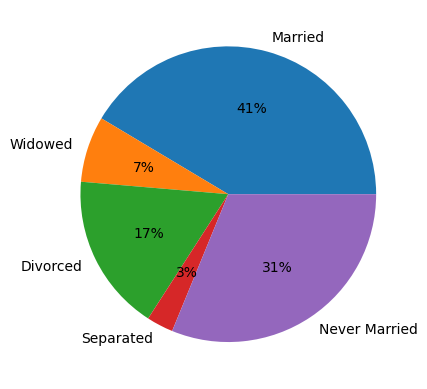

In [42]:
plt.pie(data22,labels=labels, autopct='%.0f%%')

In [50]:
hapmar18 = test18['HAPMAR'].to_frame()
hapmar22 = test22['HAPMAR'].to_frame()
hapmar18 = hapmar18.dropna()
hapmar22 = hapmar22.dropna()
print(hapmar18.describe())
print(hapmar22.describe())


           HAPMAR
count  992.000000
mean     1.387097
std      0.545928
min      1.000000
25%      1.000000
50%      1.000000
75%      2.000000
max      3.000000
            HAPMAR
count  1455.000000
mean      1.443986
std       0.588277
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       3.000000


In [51]:
hapmar18['year'] = 2018
hapmar22['year'] = 2022

In [52]:
hapmar_merge = pd.concat([hapmar18, hapmar22], ignore_index=True)
hapmar_merge.head()

,HAPMAR,year
0,1.0,2018
1,1.0,2018
2,2.0,2018
3,1.0,2018
4,2.0,2018


<Axes: ylabel='Density'>

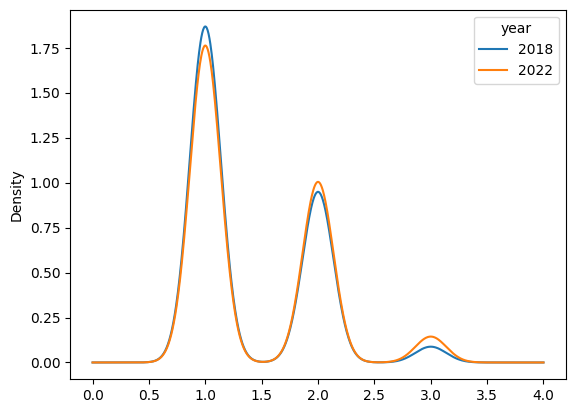

In [53]:
group_by = 'year'
var = 'HAPMAR'
hapmar_wide = hapmar_merge.pivot(columns=group_by,values=var)
hapmar_wide.plot.density()

In [54]:
hapmar_merge = hapmar_merge.replace(1.0,'very happy')
hapmar_merge = hapmar_merge.replace(2.0,'pretty happy')
hapmar_merge = hapmar_merge.replace(3.0,'not too happy')

<Axes: xlabel='HAPMAR', ylabel='count'>

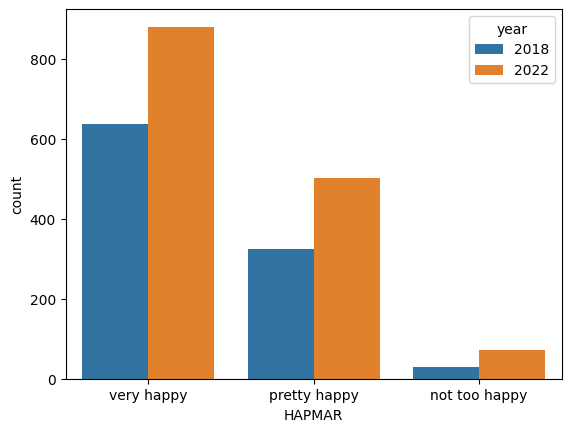

In [56]:
sns.countplot(data=hapmar_merge, x='HAPMAR', hue='year')

In [58]:
data18 = hapmar18.value_counts(sort=False).to_list()
data22 = hapmar22.value_counts(sort=False).to_list()
labels = ['very happy','pretty happy','not too happy']

([<matplotlib.patches.Wedge at 0x7dc7bfaef670>,
 [Text(-0.47816861623559825, 0.9906335217664165, 'very happy'),
  Text(0.38203562235742633, -1.031527403053343, 'pretty happy'),
  Text(1.0950391432380409, -0.10435168794273425, 'not too happy')],
 [Text(-0.2608192452194172, 0.5403455573271362, '64%'),
  Text(0.20838306674041435, -0.5626513107563689, '33%'),
  Text(0.5972940781298404, -0.056919102514218674, '3%')])

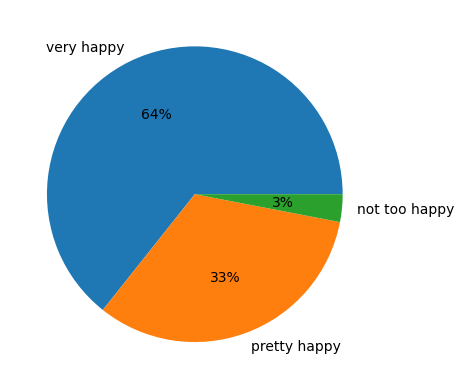

In [59]:
plt.pie(data18,labels=labels,autopct='%.0f%%')

([<matplotlib.patches.Wedge at 0x7dc7bee0bee0>,
 [Text(-0.3579377335276027, 1.0401348849630623, 'very happy'),
  Text(0.1925719890979159, -1.0830124786976705, 'pretty happy'),
  Text(1.0867343931744329, -0.1703184038552417, 'not too happy')],
 [Text(-0.19523876374232874, 0.567346300888943, '61%'),
  Text(0.10503926678068139, -0.5907340792896384, '35%'),
  Text(0.5927642144587816, -0.09290094755740455, '5%')])

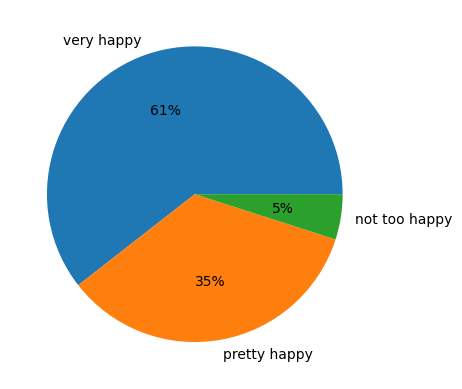

In [60]:
plt.pie(data22,labels=labels,autopct='%.0f%%')